# Employee Hiring Salary Prediction

In [1]:
import pandas as pd



In [2]:
df = pd.read_csv('hiring.csv')
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [3]:
df.describe()

,test_score(out of 10),interview_score(out of 10),salary($)
count,7.000000,8.000000,8.00000
mean,7.857143,7.875000,63000.00000
std,1.345185,1.642081,11501.55269
min,6.000000,6.000000,45000.00000
25%,7.000000,6.750000,57500.00000
50%,8.000000,7.500000,63500.00000
75%,8.500000,9.250000,70500.00000
max,10.000000,10.000000,80000.00000


In [4]:
## for filling the NaN values
## We have filled zero in place of NaN in experience column and in test_score column we have filled mean value.
df.experience.fillna('zero',inplace=True)
df["test_score(out of 10)"].fillna(int(df["test_score(out of 10)"].mean()),inplace=True)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,7.0,7,72000
7,eleven,7.0,8,80000


In [5]:
## for converting the string values in experience column to corresponding numbers. 

from word2number import w2n

df.experience = df.experience.apply(lambda x : w2n.word_to_num(x))
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,7.0,7,72000
7,11,7.0,8,80000


In [6]:
## preparing the input variables
X = df.drop("salary($)",axis=1)
X

,experience,test_score(out of 10),interview_score(out of 10)
0,0,8.0,9
1,0,8.0,6
2,5,6.0,7
3,2,10.0,10
4,7,9.0,6
5,3,7.0,10
6,10,7.0,7
7,11,7.0,8


In [7]:
## salary is the target variable
y = df["salary($)"]
y

0    50000
1    45000
2    60000
3    65000
4    70000
5    62000
6    72000
7    80000
Name: salary($), dtype: int64

In [8]:
## training the linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
## calculating the accuracy of the model.
model.score(X,y)

0.9770139014273139

### To predict Salary of person with 2 yr experience, 9 test score, 6 interview score

In [10]:
model.predict([[2,9,6]])

array([53713.86677124])

#### Salary of person with 2 yr experience, 9 test score, 6 interview score is 53713.86677124

### To predict Salary of person with 12 yr experience, 10 test score, 10 interview score

In [11]:
model.predict([[12,10,10]])

array([93747.79628651])

#### Salary of person with 12 yr experience, 10 test score, 10 interview score is 93747.79628651

In [12]:
model.coef_

array([2922.26901502, 2221.30909959, 2147.48256637])

In [13]:
model.intercept_

14992.65144669314

##### Equation is of the form y = m1x1 + m2x2 + m3x3 + c
###### Here, m1 = 2922.26901502, m2 = 2221.30909959, m3 = 2147.48256637 and  c = 14992.65144669314.
Using model.predict, we can get values of y for corresponding values of x1, x2 and x3.

ValueError: cannot copy sequence with size 8 to array axis with dimension 3

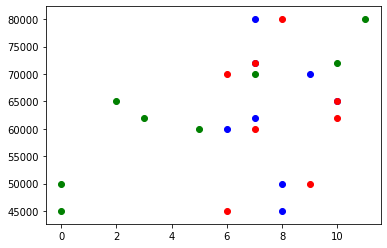

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(df['experience'],df["salary($)"],label='Experience',color='green')
plt.scatter(df['test_score(out of 10)'],df["salary($)"],label='Test score',color='blue')
plt.scatter(df['interview_score(out of 10)'],df["salary($)"],label='Interview score',color='red')
plt.plot(X,model.predict([[X]]),color='orange',label='Best fit line')
plt.legend()
plt.show()